**Day 1**

In [1]:
depths = []

input_file = open("inputs/input.txt", "r")
lines = input_file.readlines()

for line in lines:
    depths.append(int(line))

counter = 0

for i in range(1, len(depths)):
    if depths[i] > depths[i-1]:
        counter += 1

print("Part One:", counter)

counter2 = 0

for i in range(3, len(depths)):
    if depths[i] > depths[i-3]:
        counter2 += 1

print("Part Two:", counter2)

Part One: 1722
Part Two: 1748


**Day 2**

In [2]:
input_file = open("inputs/input2.txt", "r")
lines = input_file.readlines()

depths_dict = {
    "forward": 0,
    "down": 0,
    "up": 0
}

for line in lines:
    line_arr = line.split(" ")
    depths_dict[line_arr[0]] += int(line_arr[1])

print(depths_dict)
print("Part One:", depths_dict["forward"] * (depths_dict["down"] - depths_dict["up"]))

aims_dict = {
    "horizontal": 0,
    "aim": 0,
    "depth": 0
}

for line in lines:
    line_arr = line.split(" ")
    line_arr[1] = int(line_arr[1])
    if line_arr[0] == "forward":
        aims_dict["horizontal"] += line_arr[1]
        aims_dict["depth"] += (aims_dict["aim"] * line_arr[1])
    elif line_arr[0] == "down":
        aims_dict["aim"] += line_arr[1]
    else:
        aims_dict["aim"] -= line_arr[1]

print(aims_dict)
print("Part Two:", aims_dict["horizontal"] * aims_dict["depth"])

{'forward': 1968, 'down': 2018, 'up': 955}
Part One: 2091984
{'horizontal': 1968, 'aim': 1063, 'depth': 1060092}
Part Two: 2086261056


**Day 3**

In [3]:
with open("inputs/input3.txt") as input:
    lines = input.read().splitlines()

lst = [0 for i in range(len(lines[0]))]

for line in lines:
    for i in range(len(line)):
        if line[i] == "0":
            lst[i] -= 1
        else:
            lst[i] += 1

gamma = ""
epsilon = ""

for num in lst:
    if num < 0:
        gamma += "0"
        epsilon += "1"
    else:
        gamma += "1"
        epsilon += "0"

print(f"Gamma = {gamma}; Epsilon = {epsilon}")
print("Part One:", (int(gamma, 2) * int(epsilon, 2)))


def find_most_common(lines, bitty):

    for i in range(len(lines[0])):

        if len(lines) == 1:
            return lines

        # counting the most common value
        score = 0
        for line in lines:
            if line[i] == "0":
                score -= 1
            else:
                score += 1

        # creating a new list with most common values only
        if score < 0:
            lines = [x for x in lines if x[i] == bitty]
        else:
            lines = [x for x in lines if x[i] != bitty]

    return lines


oxy = find_most_common(lines, "0")[0]
co2 = find_most_common(lines, "1")[0]

print(f"Oxygen = {oxy}; CO2 = {co2}")
print("Part Two:", int(oxy, 2) * int(co2, 2))

Gamma = 101110111100; Epsilon = 010001000011
Part One: 3277364
Oxygen = 110111111111; CO2 = 011001000001
Part Two: 5736383


**Day 4**

In [4]:
input_file = open("inputs/input4.txt", "r")
lines = input_file.readlines()

drawn_nums = [int(x) for x in lines[0].split(",")]

bingo_boards = []
counter = -1

for line in lines[1:]:
    if len(line) < 5:
        bingo_boards.append([])
        counter += 1
    else:
        row = [int(x) for x in line.split()]
        bingo_boards[counter].append(row)

for board in bingo_boards:
    board.append([0])
    board[5].append(False)
    for row in board[:5]:
        board[5][0] += sum(row)


def day4(bingo_boards, drawn_nums):

    no_winners_yet = True
    num_of_winners = 0

    for num in drawn_nums:
        for board in bingo_boards:
            for row in board[:5]:
                for i in range(5):
                    if row[i] == num:
                        row[i] = -1000
                        board[5][0] -= num
            for row in board[:5]:
                if sum(row) == -5000:
                    if no_winners_yet == True:
                        print(f"Row completed! Drawn number is {num}. The sum of all unmarked numbers is {board[5][0]}. \nPart One: {num * board[5][0]}")
                    no_winners_yet = False
                    if board[5][1] == False:
                        num_of_winners += 1
                    board[5][1] = True
                    if num_of_winners == len(bingo_boards):
                        print(f"Final board has had a winner! Drawn number is {num}. The sum of all unmarked numbers is {board[5][0]}. \nPart Two: {num * board[5][0]}")
                        return None

            for i in range(5):
                column_sum = 0
                for row in board[:5]:
                    column_sum += row[i]
                if column_sum == -5000:
                    if no_winners_yet == True:
                        print(f"Column completed! Drawn number is {num}. The sum of all unmarked numbers is {board[5][0]}. \nPart One: {num * board[5][0]}")
                    no_winners_yet = False
                    if board[5][1] == False:
                        num_of_winners += 1
                    board[5][1] = True
                    if num_of_winners == len(bingo_boards):
                        print(f"Final board has had a winner! Drawn number is {num}. The sum of all unmarked numbers is {board[5][0]}. \nPart Two: {num * board[5][0]}")
                        return None

day4(bingo_boards, drawn_nums)

Row completed! Drawn number is 28. The sum of all unmarked numbers is 810. 
Part One: 22680
Final board has had a winner! Drawn number is 94. The sum of all unmarked numbers is 172. 
Part Two: 16168


**Day 5**

In [5]:
import re

with open("inputs/input5.txt") as input:
    lines = [list(map(int, re.split(r'\D+', line)))
             for line in input.read().splitlines()]

matrix = [[0 for x in range(1000)] for y in range(1000)]

two_or_more_counter = 0

horizontal_vertical_only = list(
    filter(lambda nums: nums[0] == nums[2] or nums[1] == nums[3], lines))

for line in horizontal_vertical_only:
    for y in range(min(line[1], line[3]), max(line[1], line[3])+1):
        for x in range(min(line[0], line[2]), max(line[0], line[2])+1):
            matrix[y][x] += 1

for row in matrix:
    for n in row:
        if n >= 2:
            two_or_more_counter += 1

print(f"Part One: the number of points where at least two lines overlap (horizontal or vertical only) = {two_or_more_counter}")

diagonal_only = list(
    filter(lambda nums: nums[0] != nums[2] and nums[1] != nums[3], lines))

for line in diagonal_only:
    y = line[1]
    x = line[0]
    for diff in range(abs(line[1] - line[3]) + 1):
        matrix[y][x] += 1
        y = y + (1 if line[3] > line[1] else -1)
        x = x + (1 if line[2] > line[0] else -1)

two_or_more_counter = 0

for row in matrix:
    for n in row:
        if n >= 2:
            two_or_more_counter += 1

print(f"Part Two: the number of points where at least two lines overlap (all lines) = {two_or_more_counter}")

Part One: the number of points where at least two lines overlap (horizontal or vertical only) = 5585
Part Two: the number of points where at least two lines overlap (all lines) = 17193


**Day 6**

In [6]:
with open("inputs/input6.txt") as input:
    timers = [int(timer) for timer in input.read().split(",")]

def count_fish(days):
    fish_list = [0 for i in range(9)]

    for timer in timers:
        fish_list[timer] += 1

    for i in range(days):
        new_fish = fish_list[0]
        for j in range(8):
            fish_list[j] = fish_list[j+1]
        fish_list[8] = new_fish
        fish_list[6] += new_fish
    return sum(fish_list)

print("Part One:", count_fish(80))
print("Part Two:", count_fish(256))

Part One: 380243
Part Two: 1708791884591


Solution without rotation (via Reddit)

In [7]:
with open("inputs/input6.txt") as input:
    timers = [int(timer) for timer in input.read().split(",")]

# list to store the number of fish with the same timers
timers_list = [0]*9

# populating the list with values from the given input
for timer in timers:
    timers_list[timer] += 1

for day in range(256):
    # every day, the number of fishes with timers at 0 (day%9) is added to the number of fishes with timers at 7 ((day+7)%9)
    timers_list[(day+7) % 9] += timers_list[day % 9]

**Day 7**

In [8]:
with open("inputs/input7.txt") as input:
    positions = [int(position) for position in input.read().split(",")]

minsum = float("inf")

for i in range(min(positions), max(positions)+1):
    current = 0
    for position in positions:
        current += abs(position - i)
    if current < minsum:
        minsum = current
    if current > minsum:
        break

print("Part One:", minsum)

minsum = float("inf")

for i in range(min(positions), max(positions)+1):
    current = 0
    for position in positions:
        current += (abs(position-i) + abs(position-i)**2)//2
    if current < minsum:
        minsum = current
    if current > minsum:
        break

print("Part Two:", minsum)

Part One: 356992
Part Two: 101268110


**Day 8**

Part One

In [9]:
output_lengths = []

with open("inputs/input8.txt") as input:
    for line in input.readlines():
        output_lengths.extend([len(x) for x in line.split("|")[1].split()])

unique_lengths = list(filter(lambda x: (x >= 2 and x < 5)
                      or (x == 7), output_lengths))

print("Part One:", len(unique_lengths))

Part One: 383


Part Two

In [10]:
displays = []

with open("inputs/input8.txt") as input:
    for line in input.readlines():
        halves = line.split("|")
        display = []
        for half in halves:
            display.extend(half.split())
        displays.append(display)

total_counter = 0

for display in displays:

    sets = [set() for i in range(10)]

    for word in display[:10]:
        if len(word) == 2:
            sets[1] = set(word)  # confirmed number 1
        elif len(word) == 3:
            sets[7] = set(word)  # confirmed number 7
        elif len(word) == 4:
            sets[4] = set(word)  # confirmed number 4
        elif len(word) == 7:
            sets[8] = set(word)  # confirmed number 8

    for word in display[:10]:
        if len(word) == 6:
            if len(set(word) - sets[1]) == 5:
                sets[6] = set(word)  # confirmed number 6
            elif (len(set(word) - (sets[4] | sets[7]))) == 1:
                sets[9] = set(word)  # confirmed number 9
            else:
                sets[0] = set(word)  # confirmed number 0

    for word in display[:10]:
        if len(word) == 5:
            if len(sets[6] - set(word)) == 1:
                sets[5] = set(word)  # confirmed number 5
            elif len(set(word) - sets[1]) == 3:
                sets[3] = set(word)  # confirmed number 3
            else:
                sets[2] = set(word)  # confirmed number 2

    # all numbers confirmed!

    numstr = ""

    for word in display[10:]:
        for i in range(len(sets)):
            if sets[i] == set(word):
                numstr += str(i)

    total_counter += int(numstr)

print("Part Two:", total_counter)

Part Two: 998900


**Day 9**

In [11]:
with open("inputs/input9.txt") as input:
    heightmap = [list(map(int, list("9"+line+"9"))) for line in input.read().splitlines()]

heightmap = [[9]*len(heightmap[0])] + heightmap + [[9]*len(heightmap[0])]

low_point_sum = 0

for y in range(1, len(heightmap)-1):
    for x in range(1, len(heightmap[0])-1):
        if (heightmap[y][x] < heightmap[y][x-1]) and (heightmap[y][x] < heightmap[y][x+1]) and (heightmap[y][x] < heightmap[y-1][x]) and (heightmap[y][x] < heightmap[y+1][x]):
            low_point_sum += heightmap[y][x]+1

print("Part One:", low_point_sum)


basins = []

for y in range(1, len(heightmap)-1):
    for x in range(1, len(heightmap[0])-1):
        if heightmap[y][x] < 9:
            queue = []
            queue.append((y, x))
            basin = 0
            while queue:
                y1, x1 = queue.pop(0)
                basin += 1
                heightmap[y1][x1] = 10
                if heightmap[y1][x1-1] < 9:
                    if (y1, x1-1) not in queue:
                        queue.append((y1, x1-1))
                if heightmap[y1][x1+1] < 9:
                    if (y1, x1+1) not in queue:
                        queue.append((y1, x1+1))
                if heightmap[y1-1][x1] < 9:
                    if (y1-1, x1) not in queue:
                        queue.append((y1-1, x1))
                if heightmap[y1+1][x1] < 9:
                    if (y1+1, x1) not in queue:
                        queue.append((y1+1, x1))
            basins.append(basin)

basins.sort()

b1, b2, b3 = basins[-3:]

print("Part Two:", b1*b2*b3)

Part One: 572
Part Two: 847044


**Day 10**

In [12]:
with open("inputs/input10.txt") as input:
    lines = input.read().splitlines()

points = {
    ")": 3,
    "]": 57,
    "}": 1197,
    ">": 25137
}

cleaned_lines = []

total_score = 0

for line in lines:
    while "()" in line or "[]" in line or "{}" in line or "<>" in line:
        if "()" in line:
            line = line.replace("()", "")
        if "[]" in line:
            line = line.replace("[]", "")
        if "{}" in line:
            line = line.replace("{}", "")
        if "<>" in line:
            line = line.replace("<>", "")
    cleaned_lines.append(line)
    for c in line:
        if c in points:
            total_score += points[c]
            break

print("Part One:", total_score)


incomplete_lines = []

for line in cleaned_lines:
    if ")" not in line and "]" not in line and "}" not in line and ">" not in line:
        incomplete_lines.append(line)

points = {
    "(": 1,
    "[": 2,
    "{": 3,
    "<": 4
}

scores = []

for line in incomplete_lines:
    score = 0
    for i in range(len(line)-1, -1, -1):
        score *= 5
        score += points[line[i]]
    scores.append(score)

scores.sort()

print("Part Two:", scores[len(scores)//2])

Part One: 343863
Part Two: 2924734236


**Day 11**

In [13]:
with open("inputs/input11.txt") as input:
    octopuses = [list(map(int, list(line))) for line in input.read().splitlines()]

total_counter = 0
flash_counter = 0
step_counter = 0
total_len = len(octopuses) * len(octopuses[0])

while flash_counter != total_len:
    
    flash_counter = 0
    queue = []

    for y in range(len(octopuses)):
        for x in range(len(octopuses[0])):
            octopuses[y][x] += 1
            if octopuses[y][x] == 10:
                queue.append((y,x))

    while queue:
        y1, x1 = queue.pop(0)
        for y2 in range( max(0, y1-1), min(len(octopuses), y1+2) ):
            for x2 in range( max(0, x1-1), min(len(octopuses[0]), x1+2) ):
                if octopuses[y2][x2] < 10:
                    octopuses[y2][x2] += 1
                    if octopuses[y2][x2] == 10:
                        queue.append((y2,x2))

    for y in range(len(octopuses)):
        for x in range(len(octopuses[0])):
            if octopuses[y][x] > 9:
                flash_counter += 1
                octopuses[y][x] = 0

    total_counter += flash_counter
    step_counter += 1

    if step_counter == 100:
        print("Part One:", total_counter)

print("Part Two:", step_counter)

Part One: 1661
Part Two: 334


**Day 12**

In [4]:
from collections import Counter, deque
# deque is faster than a list

caves = {}
# populating the caves dictionary with connections
with open("inputs/input12.txt") as input:
    for line in input.read().splitlines():
        a, b = line.split("-")
        caves.setdefault(a, []).append(b)
        caves.setdefault(b, []).append(a)
        # setdefault() method returns the value of the item with the specified key.
        # If the key does not exist, insert the key, with the specified value.

def condition_part2(c, path):
    return c not in ("start", "end") and all(count <= 1 for key, count in Counter(path).items() if key.islower())
    # if:
    # c is neither "start" or "end"
    # and 
    # all lowercase cs in the path are visited at most once
    # return True

for is_part2 in [False, True]:
    # ran twice, with is_part2 being False, then True
    counter = 0
    queue = deque([["start"]])
    # initialising the counter and queue
    # note that the queue contains a list of lists!

    while queue:
        # while queue is not empty
        path = queue.popleft()
        # popping out the left-most list from the queue
        last = path[-1]
        # last is the right-most cave in the popped out list

        if last == "end":
            counter += 1
            continue
            # if last is "end", we increment the counter and skip the next step

        # else
        # for each cave connected to the "last" cave
        for c in caves[last]:
            # if connected cave is uppercase
            # or the cave is not already in path
            # or, if this is part two, and condition_part2 equates to True
            if c.isupper() or c not in path or (is_part2 and condition_part2(c, path)):
                p = path.copy()
                # we make a copy of the path
                p.append(c)
                # we append the connected cave at the end of the path
                queue.append(p)
                # we append the path at the end of the queue
    print("Part Two:", counter) if is_part2 else print("Part One:", counter)

Part One: 5157
Part Two: 144309


**Day 13**

Part One: 610
Part Two:


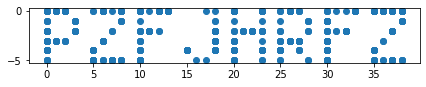

In [15]:
coordinates = []
folding_instructions = []

with open("inputs/input13.txt") as input:
    is_instructions = False
    for line in input.read().splitlines():
        if line != "" and is_instructions == False:
            a, b = line.split(",")
            coordinates.append( [int(a), int(b)] )
        elif line == "":
            is_instructions = True
        else:
            words = line.split(" ")
            instruction = words[-1].split("=")
            folding_instructions.append( (instruction[0], int(instruction[1])) )

for dir, val in folding_instructions[:1]:
    if dir == "x":
        for coordinate in coordinates:
            if coordinate[0] > val:
                coordinate[0] = val - (coordinate[0]-val)
    else:
        for coordinate in coordinates:
            if coordinate[1] > val:
                coordinate[1] = val - (coordinate[1]-val)

unique_coordinates = { tuple(x) for x in coordinates }

print("Part One:", len(unique_coordinates))

for dir, val in folding_instructions[1:]:
    if dir == "x":
        for coordinate in coordinates:
            if coordinate[0] > val:
                coordinate[0] = val - (coordinate[0]-val)
    else:
        for coordinate in coordinates:
            if coordinate[1] > val:
                coordinate[1] = val - (coordinate[1]-val)

import matplotlib.pyplot as plt

xs = [x[0] for x in coordinates]
ys = [-x[1] for x in coordinates]

plt.figure(figsize=(7, 1))
plt.scatter(xs, ys)
print("Part Two:")
plt.show()

**Day 14**

In [16]:
def solution(steps):
    insertion_dict = dict()
    pairs_count = dict()
    letters_count = dict()

    with open("inputs/input14.txt") as input:
        lines = input.read().splitlines()
        template = lines[0]
        for line in lines[2:]:
            a, b = line.split(" -> ")
            insertion_dict[a] = [a[0] + b, b + a[1]]
            pairs_count[a] = 0
            for char in a:
                letters_count[char] = 0

    # first and last letters in the template will only feature in one pair
    letters_count[template[0]] = 1
    letters_count[template[-1]] = 1

    empty_dict = dict(pairs_count)

    # inputting the template into the pair counter
    for j in range(len(template)-1):
        pairs_count[template[j:j+2]] += 1

    for i in range(steps):
        temp_dict = dict(empty_dict)
        for pair, count in pairs_count.items():
            for p in insertion_dict[pair]:
                temp_dict[p] += count
        pairs_count = dict(temp_dict)

    # counting the letters
    for k, v in pairs_count.items():
        for char in k:
            letters_count[char] += v

    return int(max(letters_count.values())/2 - min(letters_count.values())/2)

print("Part One:", solution(10))
print("Part Two:", solution(40))

Part One: 2937
Part Two: 3390034818249
